In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
import tensorflow as tf
import random

In [2]:
d = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Models/Handwritten Character Recognition/A_Z Handwritten Data.csv")

In [3]:
X = d.drop('0',axis = 1)
y = d['0']

In [4]:
X = np.array(X) / 255.0
y = np.array(y)

In [5]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

In [6]:
class_names = [chr(i + ord("A")) for i in range(26)]

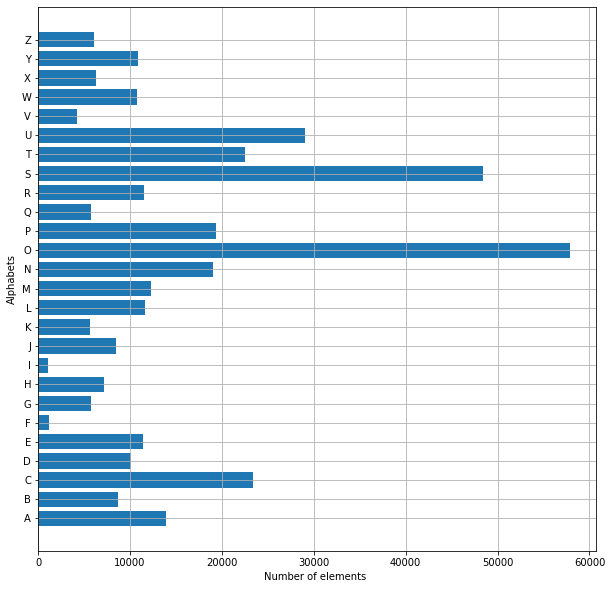

In [7]:
y_int = np.int0(y)
count = np.zeros(26, dtype='int')
for i in y_int:
    count[i] +=1

fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.barh(class_names, count)

plt.ylabel("Alphabets")
plt.xlabel("Number of elements ")
plt.grid()
plt.show()

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(784,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(26)
])

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
history = model.fit(train_X, train_y, epochs=10, validation_data=(test_X, test_y))

Epoch 1/10
9312/9312 [==============================] - 35s 3ms/step - loss: 0.4534 - accuracy: 0.8739 - val_loss: 0.1597 - val_accuracy: 0.9546
Epoch 2/10
9312/9312 [==============================] - 31s 3ms/step - loss: 0.1273 - accuracy: 0.9636 - val_loss: 0.1115 - val_accuracy: 0.9683
Epoch 3/10
9312/9312 [==============================] - 32s 3ms/step - loss: 0.0954 - accuracy: 0.9722 - val_loss: 0.1020 - val_accuracy: 0.9715
Epoch 4/10
9312/9312 [==============================] - 31s 3ms/step - loss: 0.0780 - accuracy: 0.9769 - val_loss: 0.0956 - val_accuracy: 0.9735
Epoch 5/10
9312/9312 [==============================] - 31s 3ms/step - loss: 0.0673 - accuracy: 0.9796 - val_loss: 0.0939 - val_accuracy: 0.9741
Epoch 6/10
9312/9312 [==============================] - 31s 3ms/step - loss: 0.0591 - accuracy: 0.9823 - val_loss: 0.0821 - val_accuracy: 0.9775
Epoch 7/10
9312/9312 [==============================] - 32s 3ms/step - loss: 0.0527 - accuracy: 0.9841 - val_loss: 0.0863 - val_ac

In [11]:
test_loss, test_acc = model.evaluate(test_X,  test_y, verbose=2)
print("Accuracy :", "%0.2f" % (100*test_acc), "%")

2328/2328 - 4s - loss: 0.0822 - accuracy: 0.9803
Accuracy : 98.03 %


In [12]:
def plot_image(predictions_array, true_label, img):
    img = img.reshape((28, 28))
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
            color = 'blue'
    else:
            color = 'red'

    plt.xlabel("predicted : {} \n true : {}".format(class_names[predicted_label], class_names[true_label]), color=color)

def plot_value_array(predictions_array, true_label):
    plt.grid(False)
    plt.xticks(range(26), class_names)
    plt.yticks([])
    thisplot = plt.bar(range(26), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

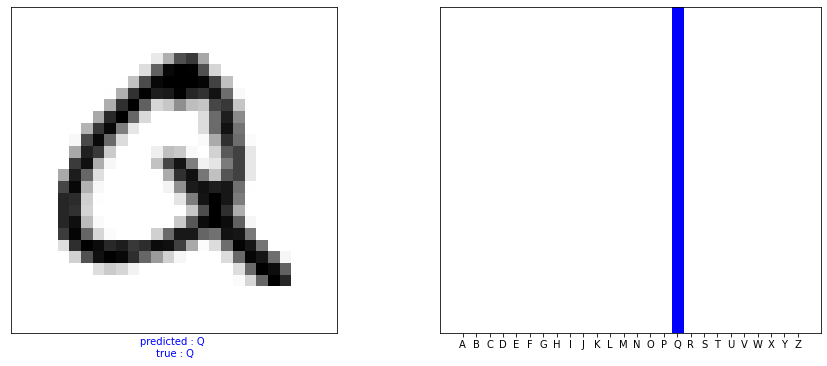

In [13]:
i = random.randint(0, len(test_X))
predictions = model.predict(np.array([test_X[i]]))
plt.figure(figsize=(15, 6))
plt.subplot(1,2,1)
plot_image(predictions, test_y[i], test_X[i])
plt.subplot(1,2,2)
predictions = predictions.flatten()
plot_value_array(predictions,  test_y[i])
plt.show()

In [15]:
model.save('Handwritten_Character_Recognition.h5')